In [129]:
!pip uninstall scikit-learn --yes


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2


In [130]:
!pip install scikit-learn==1.2.2



  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/db/98/169b46a84b48f92df2b5e163fce75d471f4df933f8b3d925a61133210776/scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)


In [131]:
!pip install imblearn


In [132]:
pip list

Package                       Version
----------------------------- ---------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.3
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8

In [133]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

%matplotlib inline
from sklearn.linear_model import LogisticRegression

**Data cleaning**

In [135]:
generaldata = pd.read_csv('general_data.csv')

In [136]:
generaldata.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [137]:
generaldata.index = range(1, len(generaldata) + 1)


In [138]:
generaldata.shape

(4410, 24)

In [139]:
generaldata.drop(['StandardHours'], axis = 'columns', inplace = True)

Some columns are removed as they are deemed not useful for the study. These include "EmployeeID", "EmployeeCount" and "Over18". These were removed from the original dataset.
Then, the columns that are categorical was put through one hot encoding to find the precise effects of each.

In [140]:
generaldata.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [141]:
pd.set_option('display.max_columns', None)

In [142]:
generaldata['Attrition'] = pd.factorize(generaldata['Attrition'])[0]

In [143]:
generaldata['Gender'] = pd.factorize(generaldata['Gender'])[0]

For columns with missing data, the mean of the column data was used.

In [144]:
generaldata.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                       int64
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [201]:
generaldata.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [146]:
generaldata['NumCompaniesWorked'] = generaldata['NumCompaniesWorked'].fillna(generaldata['NumCompaniesWorked'].mean())

In [147]:
generaldata['TotalWorkingYears'] = generaldata['TotalWorkingYears'].fillna(generaldata['TotalWorkingYears'].mean())

In [248]:
features = [
    'Age', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
        'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'Department'
]

X = generaldata[features]
X = pd.get_dummies(columns=['BusinessTravel',
                            'Education',
                            'EducationField',
                            'JobRole',
                            'MaritalStatus',
                            'StockOptionLevel',
                            'TrainingTimesLastYear',
                            'Department'], drop_first=False, data= X, dtype=int)
y = generaldata['Attrition']


In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    random_state = 50)

In [250]:
y_train

2640    0
3476    0
4006    0
1436    0
3265    0
       ..
3331    0
71      0
133     0
2015    0
1932    0
Name: Attrition, Length: 3528, dtype: int64

In [251]:
X_train

,Age,DistanceFromHome,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,TrainingTimesLastYear_0,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,Department_Human Resources,Department_Research & Development,Department_Sales
2640,40,1,1,2,50710,8.0,17,8.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3476,28,1,1,2,63470,1.0,15,4.0,4,2,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4006,28,7,1,1,89660,1.0,16,3.0,3,2,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1436,38,1,1,4,64720,0.0,12,17.0,16,5,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3265,40,10,1,2,65670,1.0,13,8.0,8,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3331,37,13,0,3,35640,5.0,11,10.0,5,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
71,33,4,1,4,47880,3.0,11,9.0,7,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
133,43,10,0,1,46170,1.0,11,25.0,25,3,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
2015,33,9,0,2,46490,0.0,12,4.0,3,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


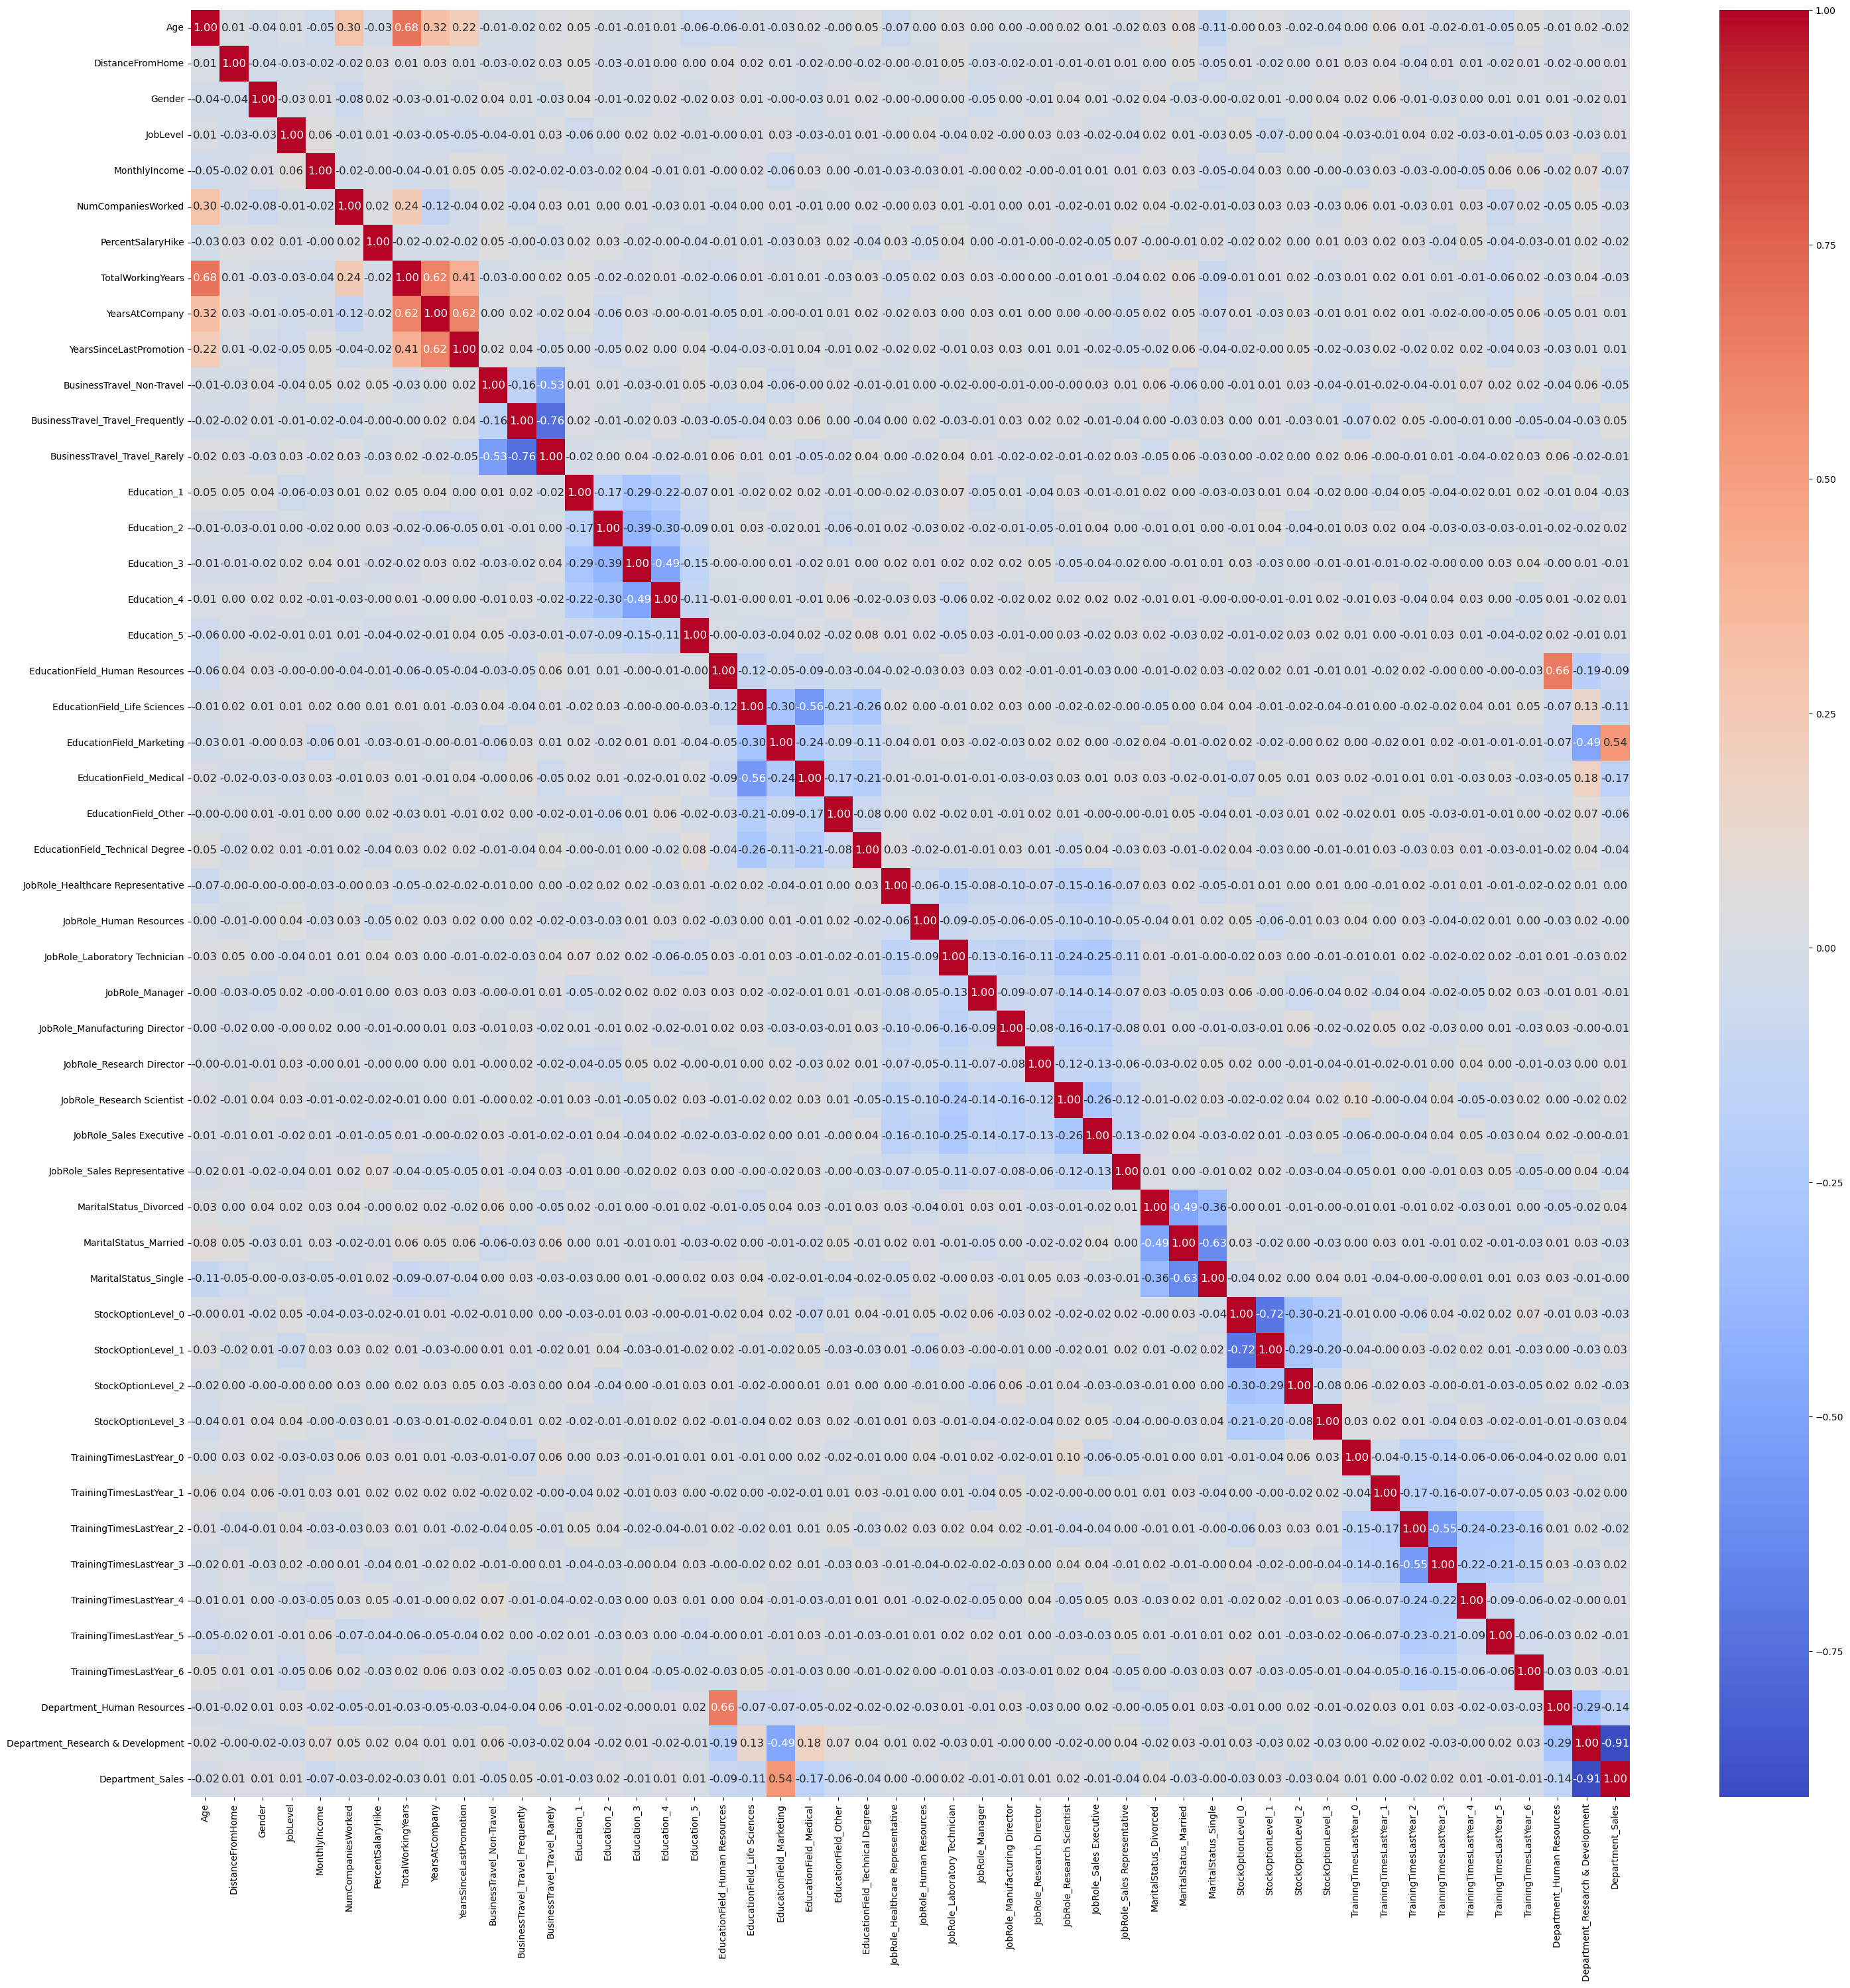

In [252]:
plt.figure(figsize=(35, 35))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 12}, )

plt.title("")
plt.show()

After one hot encoding the categorical variables, some of these features showed strong correlation with other features. This could cause heavy skew in the results of the model. Hence, some of these (BusinessTravel_Travel_Frequently and Department_Research & Development) were removed.

In [253]:
X_train.drop(['BusinessTravel_Travel_Frequently',
             'Department_Research & Development'], axis = 'columns', inplace = True)

In [254]:
X_test.drop(['BusinessTravel_Travel_Frequently',
             'Department_Research & Development'], axis = 'columns', inplace = True)

**Data modelling**

In [255]:
Scaler_X = StandardScaler()
X_train_sc = Scaler_X.fit_transform(X_train)
X_test_sc = Scaler_X.transform(X_test)

In [257]:
logreg = LogisticRegression()

logreg.fit(X_train_sc, y_train)

print(f'Logistic Regression Intercept: {logreg.intercept_}')
print(f'Logistic Regression Coefficient: {logreg.coef_}')

Logistic Regression Intercept: [-2.04181057]
Logistic Regression Coefficient: [[-0.28362326 -0.04007846  0.08881057 -0.06001248 -0.01787243  0.3546515
   0.05264093 -0.47833252 -0.37469418  0.45347952 -0.43449832 -0.31261611
  -0.02275544  0.08742349 -0.00255252 -0.02755167 -0.07574947  0.10333474
   0.00669526  0.03536886 -0.00102275 -0.04323521 -0.06263693 -0.04582837
  -0.03783218  0.01674263 -0.05988855 -0.15737499  0.13187443  0.03947319
   0.0837167  -0.02140927 -0.17299768 -0.10563411  0.26781622  0.0848534
  -0.07753161  0.01054999 -0.03113248  0.03881248  0.01541005  0.06187383
   0.06823067 -0.07178405 -0.00810698 -0.25222044  0.12786333 -0.09199236]]


In [260]:
coef_df

,Feature,Coefficient
0,Age,-0.027623
1,DistanceFromHome,-0.022652
2,Gender,0.002145
3,JobLevel,-0.004769
4,MonthlyIncome,-0.000002
5,NumCompaniesWorked,0.052832
6,PercentSalaryHike,0.018116
7,TotalWorkingYears,-0.051260
8,YearsAtCompany,-0.053825
9,YearsSinceLastPromotion,0.037231


In [261]:
y_pred = logreg.predict(X_test_sc)

In [262]:
np.round(logreg.predict_proba(X_test_sc), 3)

array([[0.863, 0.137],
       [0.97 , 0.03 ],
       [0.977, 0.023],
       ...,
       [0.991, 0.009],
       [0.468, 0.532],
       [0.618, 0.382]])

**Data evaluation**

In [263]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [264]:
logreg.score(X_train_sc, y_train)

0.8497732426303855

In [265]:
logreg.score(X_test_sc, y_test)

0.8310657596371882

In [266]:
accuracy_scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')

C:\Users\SEMESTI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [267]:
average_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy: {average_accuracy:.4f}")

Average Accuracy: 0.8388


In [268]:
cm = confusion_matrix(y_test,y_pred)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8310657596371882
[[720  11]
 [138  13]]


In [269]:
cm_df = pd.DataFrame(cm, index=["Actual Stay", "Actual Leave"], columns=["Predicted Stay", "Predicted Leave"])

In [270]:
print(cm_df)

              Predicted Stay  Predicted Leave
Actual Stay              720               11
Actual Leave             138               13


In [271]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       731
           1       0.54      0.09      0.15       151

    accuracy                           0.83       882
   macro avg       0.69      0.54      0.53       882
weighted avg       0.79      0.83      0.78       882

